<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Primary_applicant_age_in_years                            1000 non-null   int64 
 1   Gender                                                    1000 non-null   object
 2   Marital_status                                            1000 non-null   object
 3   Number_of_dependents                                      1000 non-null   int64 
 4   Housing                                                   1000 non-null   object
 5   Years_at_current_residence                                1000 non-null   int64 
 6   Employment_status                                         1000 non-null   object
 7   Has_been_employed_for_at_least                            938 non-null    object
 8   Has_been_employed_for_at_most

/var/folders/1k/z86hv7ks1kq2xdf3fllf0mm00000gn/T/ipykernel_7977/2114855982.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())
/var/folders/1k/z86hv7ks1kq2xdf3fllf0mm00000gn/T/ipykernel_7977/2114855982.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


<AxesSubplot:xlabel='Risk'>

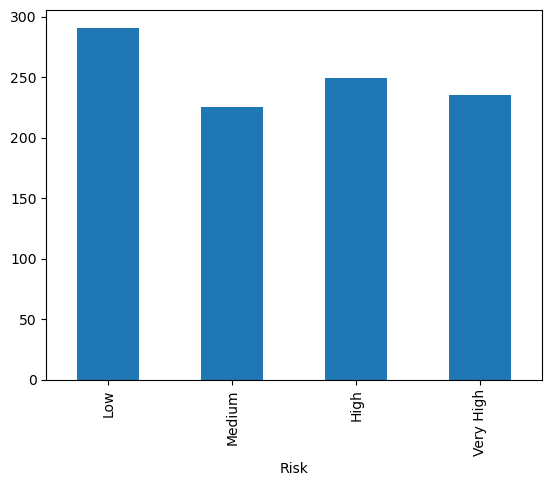

In [7]:
import pandas as pd
import numpy as np

# Load the data
applicant_df = pd.read_csv("applicant.csv")
loan_df = pd.read_csv("loan.csv")

# Merge the dataframes
df = applicant_df.merge(loan_df, on="applicant_id")

# Drop the unnecessary columns
df = df.drop(["applicant_id", "Months_loan_taken_for", "Purpose", "Principal_loan_amount", "EMI_rate_in_percentage_of_disposable_income", "Property", "Has_coapplicant", "Has_guarantor", "Other_EMI_plans", "Number_of_existing_loans_at_this_bank", "Loan_history"], axis=1)

# Inspect the data
df.info()

# Check for missing values
df.isna().sum()

# Impute the missing values
df = df.fillna(df.median())

# Check for skewness
df.skew()

# Remove the outliers
df = df[df["Primary_applicant_age_in_years"] < 100]

# Segment the customers based on their risk of default
df["Risk"] = pd.qcut(df["Primary_applicant_age_in_years"], 4, labels=["Low", "Medium", "High", "Very High"])

# Visualize the data
df.groupby("Risk").size().plot(kind="bar")


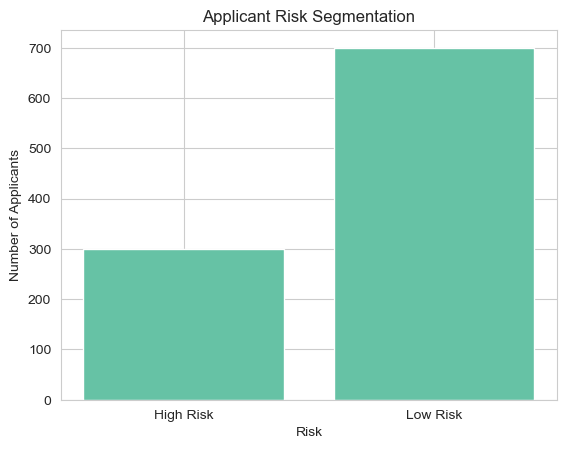

In [28]:
import matplotlib.pyplot as plt

high_risk_count = loans['high_risk_applicant'].sum()
low_risk_count = len(loans) - high_risk_count

# Create a bar plot
x_labels = ['High Risk', 'Low Risk']
values = [high_risk_count, low_risk_count]
plt.bar(x_labels, values)

# Add axis labels and a title
plt.xlabel('Risk')
plt.ylabel('Number of Applicants')
plt.title('Applicant Risk Segmentation')

# Show the plot
plt.show()

In [29]:
df = pd.merge(applicant_df, loan_df, on='applicant_id')

# Calculate the percentage of high-risk applications for each combination of attributes
grouped = df.groupby(['Employment_status', 'Purpose', 'Savings_account_balance', 'Balance_in_existing_bank_account_(lower_limit_of_bucket)', 'Property', 'Housing']).agg({'high_risk_applicant': 'mean'})
grouped = grouped.reset_index()
grouped = grouped.rename(columns={'high_risk_application': 'percentage_high_risk'})

# Print the results
print(grouped)

                                     Employment_status       Purpose  \
0    management / self-employed / highly qualified ...          FF&E   
1    management / self-employed / highly qualified ...          FF&E   
2    management / self-employed / highly qualified ...          FF&E   
3    management / self-employed / highly qualified ...          FF&E   
4    management / self-employed / highly qualified ...      business   
..                                                 ...           ...   
127                               unskilled - resident   new vehicle   
128                               unskilled - resident  repair costs   
129                               unskilled - resident  repair costs   
130                               unskilled - resident  repair costs   
131                               unskilled - resident  repair costs   

    Savings_account_balance  \
0                       Low   
1                       Low   
2                       Low   
3          

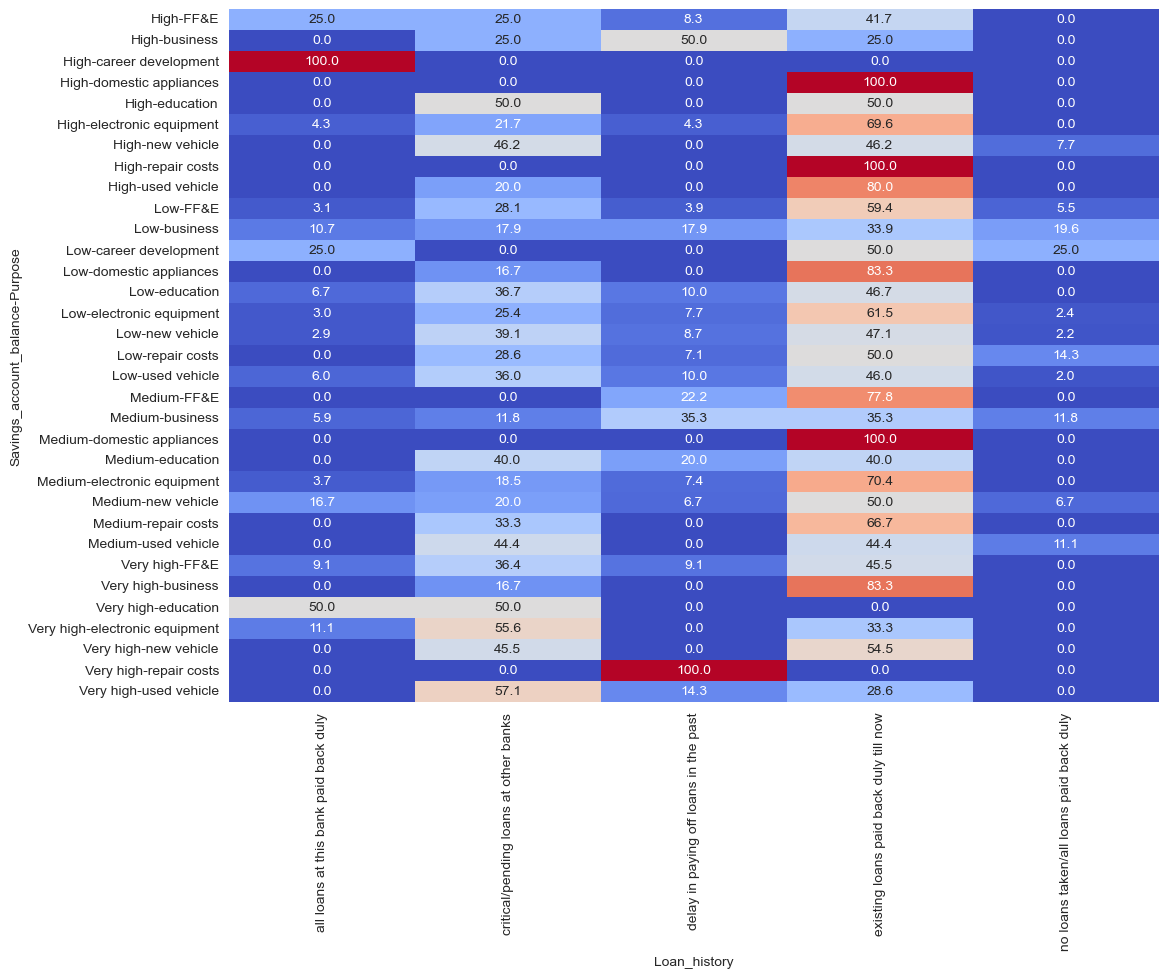

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table with counts of high-risk applications for each combination of attributes
pivot_table = pd.pivot_table(df, values='high_risk_applicant', index=['Savings_account_balance', 'Purpose'], columns=['Loan_history'], aggfunc=len, fill_value=0)

# Calculate the percentage of high-risk applications for each combination of attributes
pivot_table = pivot_table.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Set the figure size
plt.figure(figsize=(12, 9))

# Plot the heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', cbar=False)

# Show the plot
plt.show()
